In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris, load_files

# IRIS analysis

In [5]:
iris = sns.load_dataset('iris')

In [27]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
iris.shape

(150, 5)

In [36]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Vis

Text(0.5,1,'Boxplot')

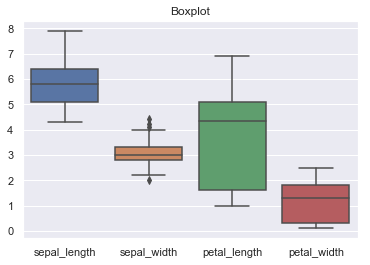

In [67]:
sns.boxplot(data = iris)
plt.title('Boxplot')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Violin Plot')

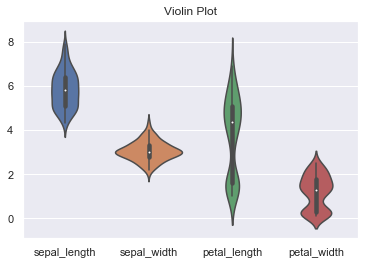

In [68]:
sns.violinplot(data = iris)
plt.title('Violin Plot')

Text(0.5,1,'Swarm plot')

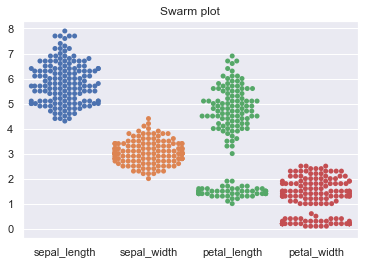

In [69]:
sns.swarmplot(data = iris)
plt.title('Swarm plot')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A2075C1F60>,
      dtype=object)

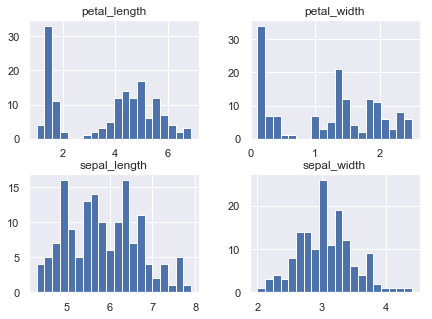

In [59]:
iris.hist(figsize = (7,5), bins = 20)

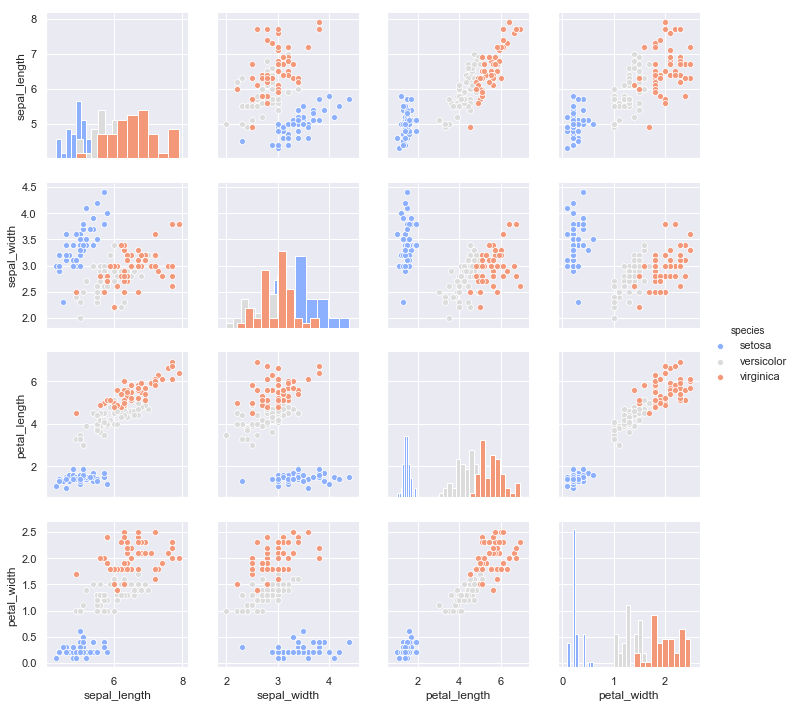

In [63]:
sns.set(style = 'darkgrid')
sns.pairplot(iris, hue = 'species', palette = 'coolwarm', diag_kind='hist')

Text(0.5,1,'3D scatter plot')

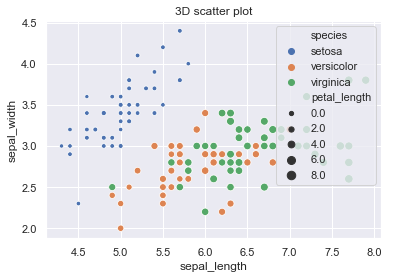

In [76]:
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', size = 'petal_length', data = iris, hue = 'species')
plt.title('3D scatter plot')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop('species', axis = 1), 
                                                    iris['species'], test_size = 0.3, random_state = 101)

### k nearest neighbor

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier()

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
kn_pred = knn.predict(X_test)
kn_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor'], dtype=object)

In [20]:
knp_pred = knn.predict_proba(X_test)
knp_pred[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [21]:
print('Confusion Matrix')
print(confusion_matrix(y_test, kn_pred))
print('\n')
print(classification_report(y_test, kn_pred))

Confusion Matrix
[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      1.00      1.00        20
  virginica       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        45



### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
lr_pred = model.predict(X_test)

In [33]:
print('Confusion Matrix')
print(confusion_matrix(y_test, lr_pred))
print('\n')
print('Classification report')
print(classification_report(y_test, lr_pred))

Confusion Matrix
[[13  0  0]
 [ 0 18  2]
 [ 0  0 12]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.90      0.95        20
  virginica       0.86      1.00      0.92        12

avg / total       0.96      0.96      0.96        45



In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [67]:
grid_param = {
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'C': [0.01, 0.1, 1, 10, 100]
}
grid = GridSearchCV(SVC(), grid_param, refit=True, verbose=2)


In [68]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [62]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [65]:
svc_pred = grid.predict(X_test)

In [66]:
print('Confusion Matrix')
print(confusion_matrix(y_test, lr_pred))
print('\n')
print('Classification report')
print(classification_report(y_test, lr_pred))

Confusion Matrix
[[13  0  0]
 [ 0 18  2]
 [ 0  0 12]]


Classification report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.90      0.95        20
  virginica       0.86      1.00      0.92        12

avg / total       0.96      0.96      0.96        45

